In [5]:
!pip install nltk

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv("vacuum_reviews.csv")

In [8]:
data.head(5)

,Reviewer Name,Star Rating,Date,Location,Title,Review Content
0,Lydia Martinez,4.0,"February 20, 2023",United States,Yes x3,I was so skeptical at the time i opened it n s...
1,Ohukno,4.0,"June 18, 2021",United States,Good device with some flaws,I wish I would've taken a before and after pic...
2,Nicole N.,4.0,"March 3, 2023",United States,Great for quick clean ups,This little vacuum is better than I expected i...
3,Jacquelyn B. VINE VOICE,4.0,"January 18, 2023",United States,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...
4,Liz Curruchich,4.0,"January 16, 2023",United States,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...


In [9]:
df = data

In [10]:
df = df.drop(columns='Location')

In [11]:
df = df.drop(columns='Reviewer Name')

In [12]:
df = df.drop(columns='Date')

In [13]:
df.head()

,Star Rating,Title,Review Content
0,4.0,Yes x3,I was so skeptical at the time i opened it n s...
1,4.0,Good device with some flaws,I wish I would've taken a before and after pic...
2,4.0,Great for quick clean ups,This little vacuum is better than I expected i...
3,4.0,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...
4,4.0,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...


In [17]:
import re

def clean_text(text):
    # remove special characters and digits
    text = re.sub('[^a-zA-Z\s]', '', text)
    text = re.sub('\d+', '', text)
    # convert to lowercase
    text = text.lower()
    # remove whitespace
    text = text.strip()
    return text

In [64]:
# apply the clean_text() function to the 'review_text' column of the DataFrame
df['clean_text'] = df['Review Content'].apply(clean_text)

In [65]:
df.head()

,Star Rating,Title,Review Content,clean_text,tokens,cleaned_tokens,Date
0,4.0,Yes x3,I was so skeptical at the time i opened it n s...,i was so skeptical at the time i opened it n s...,"[i, was, so, skeptical, at, the, time, i, open...","[skeptical, time, opened, n, saw, small, sucti...","February 20, 2023"
1,4.0,Good device with some flaws,I wish I would've taken a before and after pic...,i wish i wouldve taken a before and after pict...,"[i, wish, i, wouldve, taken, a, before, and, a...","[wish, wouldve, taken, picture, youll, take, w...","June 18, 2021"
2,4.0,Great for quick clean ups,This little vacuum is better than I expected i...,this little vacuum is better than i expected i...,"[this, little, vacuum, is, better, than, i, ex...","[little, vacuum, better, expected, long, cord,...","March 3, 2023"
3,4.0,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...,color blackverified purchase\nthis is a cute a...,"[color, blackverified, purchase, this, is, a, ...","[color, blackverified, purchase, cute, moderat...","January 18, 2023"
4,4.0,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...,the vacuum worked great husband and i took a l...,"[the, vacuum, worked, great, husband, and, i, ...","[vacuum, worked, great, husband, took, long, r...","January 16, 2023"


In [66]:
import nltk
nltk.download('punkt')

def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sohyeon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
# apply the tokenize_text() function to the 'clean_text' column of the DataFrame
df['tokens'] = df['clean_text'].apply(tokenize_text)

In [68]:
df.head()

,Star Rating,Title,Review Content,clean_text,tokens,cleaned_tokens,Date
0,4.0,Yes x3,I was so skeptical at the time i opened it n s...,i was so skeptical at the time i opened it n s...,"[i, was, so, skeptical, at, the, time, i, open...","[skeptical, time, opened, n, saw, small, sucti...","February 20, 2023"
1,4.0,Good device with some flaws,I wish I would've taken a before and after pic...,i wish i wouldve taken a before and after pict...,"[i, wish, i, wouldve, taken, a, before, and, a...","[wish, wouldve, taken, picture, youll, take, w...","June 18, 2021"
2,4.0,Great for quick clean ups,This little vacuum is better than I expected i...,this little vacuum is better than i expected i...,"[this, little, vacuum, is, better, than, i, ex...","[little, vacuum, better, expected, long, cord,...","March 3, 2023"
3,4.0,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...,color blackverified purchase\nthis is a cute a...,"[color, blackverified, purchase, this, is, a, ...","[color, blackverified, purchase, cute, moderat...","January 18, 2023"
4,4.0,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...,the vacuum worked great husband and i took a l...,"[the, vacuum, worked, great, husband, and, i, ...","[vacuum, worked, great, husband, took, long, r...","January 16, 2023"


In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sohyeon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [71]:
df['cleaned_tokens'] = df['tokens'].apply(remove_stopwords)

In [72]:
df.head()

,Star Rating,Title,Review Content,clean_text,tokens,cleaned_tokens,Date
0,4.0,Yes x3,I was so skeptical at the time i opened it n s...,i was so skeptical at the time i opened it n s...,"[i, was, so, skeptical, at, the, time, i, open...","[skeptical, time, opened, n, saw, small, sucti...","February 20, 2023"
1,4.0,Good device with some flaws,I wish I would've taken a before and after pic...,i wish i wouldve taken a before and after pict...,"[i, wish, i, wouldve, taken, a, before, and, a...","[wish, wouldve, taken, picture, youll, take, w...","June 18, 2021"
2,4.0,Great for quick clean ups,This little vacuum is better than I expected i...,this little vacuum is better than i expected i...,"[this, little, vacuum, is, better, than, i, ex...","[little, vacuum, better, expected, long, cord,...","March 3, 2023"
3,4.0,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...,color blackverified purchase\nthis is a cute a...,"[color, blackverified, purchase, this, is, a, ...","[color, blackverified, purchase, cute, moderat...","January 18, 2023"
4,4.0,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...,the vacuum worked great husband and i took a l...,"[the, vacuum, worked, great, husband, and, i, ...","[vacuum, worked, great, husband, took, long, r...","January 16, 2023"


In [73]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sohyeon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
# create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# define a function to apply lemmatization to a list of tokens
def lemmatize_tokens(tokens):
    # apply lemmatization to each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

In [75]:
# apply lemmatization to the 'review_text' column of the DataFrame
df['lemmatized_tokens'] = df['cleaned_tokens'].apply(lemmatize_tokens)


LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\sohyeon/nltk_data'
    - 'C:\\Users\\sohyeon\\anaconda3\\nltk_data'
    - 'C:\\Users\\sohyeon\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\sohyeon\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\sohyeon\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [76]:
df.head()

,Star Rating,Title,Review Content,clean_text,tokens,cleaned_tokens,Date
0,4.0,Yes x3,I was so skeptical at the time i opened it n s...,i was so skeptical at the time i opened it n s...,"[i, was, so, skeptical, at, the, time, i, open...","[skeptical, time, opened, n, saw, small, sucti...","February 20, 2023"
1,4.0,Good device with some flaws,I wish I would've taken a before and after pic...,i wish i wouldve taken a before and after pict...,"[i, wish, i, wouldve, taken, a, before, and, a...","[wish, wouldve, taken, picture, youll, take, w...","June 18, 2021"
2,4.0,Great for quick clean ups,This little vacuum is better than I expected i...,this little vacuum is better than i expected i...,"[this, little, vacuum, is, better, than, i, ex...","[little, vacuum, better, expected, long, cord,...","March 3, 2023"
3,4.0,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...,color blackverified purchase\nthis is a cute a...,"[color, blackverified, purchase, this, is, a, ...","[color, blackverified, purchase, cute, moderat...","January 18, 2023"
4,4.0,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...,the vacuum worked great husband and i took a l...,"[the, vacuum, worked, great, husband, and, i, ...","[vacuum, worked, great, husband, took, long, r...","January 16, 2023"


In [38]:
df1 = df[['Star Rating', 'Title', 'lemmatized_tokens']]

KeyError: "['lemmatized_tokens'] not in index"

In [39]:
df1.head()

NameError: name 'df1' is not defined

In [40]:
df1.to_csv('preprocessed_vacuum_reviews.csv')

NameError: name 'df1' is not defined

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sohyeon\AppData\Roaming\nltk_data...


True

In [42]:
# create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# define a function to apply sentiment analysis to a list of lemmatized tokens
def analyze_sentiment(tokens):
    # join the tokens back into a string of text
    text = ' '.join(tokens)
    
    # get the sentiment scores for the text using VADER
    sentiment_scores = sia.polarity_scores(text)
    
    # extract the compound score, which ranges from -1 (most negative) to 1 (most positive)
    compound_score = sentiment_scores['compound']
    
    # determine the sentiment label based on the compound score
    if compound_score >= 0.05:
        sentiment_label = 'positive'
    elif compound_score <= -0.05:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
    
    return sentiment_label

In [43]:
# apply sentiment analysis to the 'lemmatized_text' column of the DataFrame
df['sentiment'] = df['lemmatized_tokens'].apply(analyze_sentiment)

KeyError: 'lemmatized_tokens'

In [44]:
df.head()

,Star Rating,Title,Review Content,clean_text,tokens,cleaned_tokens
0,4.0,Yes x3,I was so skeptical at the time i opened it n s...,i was so skeptical at the time i opened it n s...,"[i, was, so, skeptical, at, the, time, i, open...","[skeptical, time, opened, n, saw, small, sucti..."
1,4.0,Good device with some flaws,I wish I would've taken a before and after pic...,i wish i wouldve taken a before and after pict...,"[i, wish, i, wouldve, taken, a, before, and, a...","[wish, wouldve, taken, picture, youll, take, w..."
2,4.0,Great for quick clean ups,This little vacuum is better than I expected i...,this little vacuum is better than i expected i...,"[this, little, vacuum, is, better, than, i, ex...","[little, vacuum, better, expected, long, cord,..."
3,4.0,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...,color blackverified purchase\nthis is a cute a...,"[color, blackverified, purchase, this, is, a, ...","[color, blackverified, purchase, cute, moderat..."
4,4.0,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...,the vacuum worked great husband and i took a l...,"[the, vacuum, worked, great, husband, and, i, ...","[vacuum, worked, great, husband, took, long, r..."


In [45]:
import matplotlib.pyplot as plt

In [46]:
# create a list of all the lemmatized tokens in the dataset
tokens = [token for review in df['lemmatized_tokens'] for token in review]

KeyError: 'lemmatized_tokens'

In [47]:
# count the frequency of each token
token_counts = pd.Series(tokens).value_counts()

NameError: name 'tokens' is not defined

In [49]:
# create a bar chart of the top 10 tokens
token_counts.head(10).plot(kind='bar')
plt.show()

NameError: name 'token_counts' is not defined

In [50]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [51]:
# create a word cloud of the top 100 tokens
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(pd.Series(tokens).value_counts())


NameError: name 'WordCloud' is not defined

In [52]:
# display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'wordcloud' is not defined

<Figure size 576x576 with 0 Axes>

In [53]:
import seaborn as sns

In [54]:
# define a function to apply sentiment analysis to a list of lemmatized tokens
def analyze_sentiment(tokens):
    # join the tokens back into a string of text
    text = ' '.join(tokens)
    
    # get the sentiment scores for the text using VADER
    sentiment_scores = sia.polarity_scores(text)
    
    # extract the compound score, which ranges from -1 (most negative) to 1 (most positive)
    compound_score = sentiment_scores['compound']
    
    return compound_score

In [55]:
# apply sentiment analysis to the 'lemmatized_tokens' column of the DataFrame
df['sentiment_score'] = df['lemmatized_tokens'].apply(analyze_sentiment)

KeyError: 'lemmatized_tokens'

In [56]:
df.head()

,Star Rating,Title,Review Content,clean_text,tokens,cleaned_tokens
0,4.0,Yes x3,I was so skeptical at the time i opened it n s...,i was so skeptical at the time i opened it n s...,"[i, was, so, skeptical, at, the, time, i, open...","[skeptical, time, opened, n, saw, small, sucti..."
1,4.0,Good device with some flaws,I wish I would've taken a before and after pic...,i wish i wouldve taken a before and after pict...,"[i, wish, i, wouldve, taken, a, before, and, a...","[wish, wouldve, taken, picture, youll, take, w..."
2,4.0,Great for quick clean ups,This little vacuum is better than I expected i...,this little vacuum is better than i expected i...,"[this, little, vacuum, is, better, than, i, ex...","[little, vacuum, better, expected, long, cord,..."
3,4.0,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...,color blackverified purchase\nthis is a cute a...,"[color, blackverified, purchase, this, is, a, ...","[color, blackverified, purchase, cute, moderat..."
4,4.0,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...,the vacuum worked great husband and i took a l...,"[the, vacuum, worked, great, husband, and, i, ...","[vacuum, worked, great, husband, took, long, r..."


In [57]:
# create a scatterplot of sentiment scores vs. review lengths
sns.scatterplot(data=df, x='sentiment_score', y=df['lemmatized_tokens'].apply(len))
plt.show()

KeyError: 'lemmatized_tokens'

In [58]:
df['Date'] = data['Date']

In [59]:
df.head()

,Star Rating,Title,Review Content,clean_text,tokens,cleaned_tokens,Date
0,4.0,Yes x3,I was so skeptical at the time i opened it n s...,i was so skeptical at the time i opened it n s...,"[i, was, so, skeptical, at, the, time, i, open...","[skeptical, time, opened, n, saw, small, sucti...","February 20, 2023"
1,4.0,Good device with some flaws,I wish I would've taken a before and after pic...,i wish i wouldve taken a before and after pict...,"[i, wish, i, wouldve, taken, a, before, and, a...","[wish, wouldve, taken, picture, youll, take, w...","June 18, 2021"
2,4.0,Great for quick clean ups,This little vacuum is better than I expected i...,this little vacuum is better than i expected i...,"[this, little, vacuum, is, better, than, i, ex...","[little, vacuum, better, expected, long, cord,...","March 3, 2023"
3,4.0,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...,color blackverified purchase\nthis is a cute a...,"[color, blackverified, purchase, this, is, a, ...","[color, blackverified, purchase, cute, moderat...","January 18, 2023"
4,4.0,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...,the vacuum worked great husband and i took a l...,"[the, vacuum, worked, great, husband, and, i, ...","[vacuum, worked, great, husband, took, long, r...","January 16, 2023"


In [ ]:
# convert the review_date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Star Rating,Title,Review Content,clean_text,tokens,cleaned_tokens,lemmatized_tokens,sentiment,sentiment_score,Date
0,4.0,Yes x3,I was so skeptical at the time i opened it n s...,i was so skeptical at the time i opened it n s...,"[i, was, so, skeptical, at, the, time, i, open...","[skeptical, time, opened, n, saw, small, sucti...","[skeptical, time, opened, n, saw, small, sucti...",positive,0.4902,2023-02-20
1,4.0,Good device with some flaws,I wish I would've taken a before and after pic...,i wish i wouldve taken a before and after pict...,"[i, wish, i, wouldve, taken, a, before, and, a...","[wish, wouldve, taken, picture, youll, take, w...","[wish, wouldve, taken, picture, youll, take, w...",positive,0.9968,2021-06-18
2,4.0,Great for quick clean ups,This little vacuum is better than I expected i...,this little vacuum is better than i expected i...,"[this, little, vacuum, is, better, than, i, ex...","[little, vacuum, better, expected, long, cord,...","[little, vacuum, better, expected, long, cord,...",positive,0.8875,2023-03-03
3,4.0,"nice accessories for a car, but I prefer a mor...",Color: BlackVerified Purchase\nThis is a cute ...,color blackverified purchase\nthis is a cute a...,"[color, blackverified, purchase, this, is, a, ...","[color, blackverified, purchase, cute, moderat...","[color, blackverified, purchase, cute, moderat...",positive,0.9718,2023-01-18
4,4.0,Works great with powerful suction!,The vacuum worked great! Husband and I took a ...,the vacuum worked great husband and i took a l...,"[the, vacuum, worked, great, husband, and, i, ...","[vacuum, worked, great, husband, took, long, r...","[vacuum, worked, great, husband, took, long, r...",positive,0.8934,2023-01-16


In [ ]:
# group the reviews by time interval and calculate the average sentiment score for each group
sentiment_by_time = df.groupby(pd.Grouper(key='Date', freq='M'))['sentiment_score'].mean().reset_index()


In [ ]:
sentiment_by_time

,Date,sentiment_score
0,2021-06-30,0.996800
1,2021-07-31,NaN
2,2021-08-31,NaN
3,2021-09-30,NaN
4,2021-10-31,NaN
5,2021-11-30,NaN
6,2021-12-31,NaN
7,2022-01-31,NaN
8,2022-02-28,NaN
9,2022-03-31,NaN


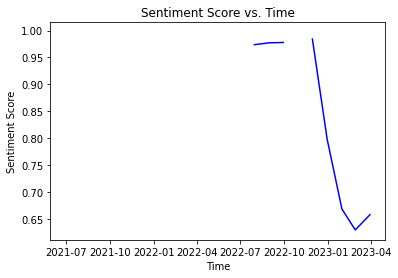

In [ ]:
# plot a line graph of sentiment score vs time
plt.plot(sentiment_by_time['Date'], sentiment_by_time['sentiment_score'], color='blue')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score vs. Time')
plt.show()

In [ ]:
import networkx as nx


In [ ]:
cooccurrence = pd.crosstab(pd.Series(tokens[:-1]), pd.Series(tokens[1:]))

In [ ]:
# calculate pointwise mutual information
pmi = cooccurrence.apply(lambda row: row/row.sum(), axis=1).apply(lambda col: col/col.sum(), axis=0)
pmi = pmi * (pmi > 0).sum().sum()

In [61]:
# create a network graph of co-occurring words
G = nx.from_pandas_adjacency(pmi)
G = nx.relabel_nodes(G, lambda x: x.capitalize())

# plot the network graph
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.3, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')
plt.axis('off')
plt.show()

NameError: name 'nx' is not defined

In [60]:
# plot the network graph with a larger figure size and increased spacing
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, k=0.7, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')
plt.axis('off')
plt.show()

NameError: name 'nx' is not defined

<Figure size 2160x2160 with 0 Axes>

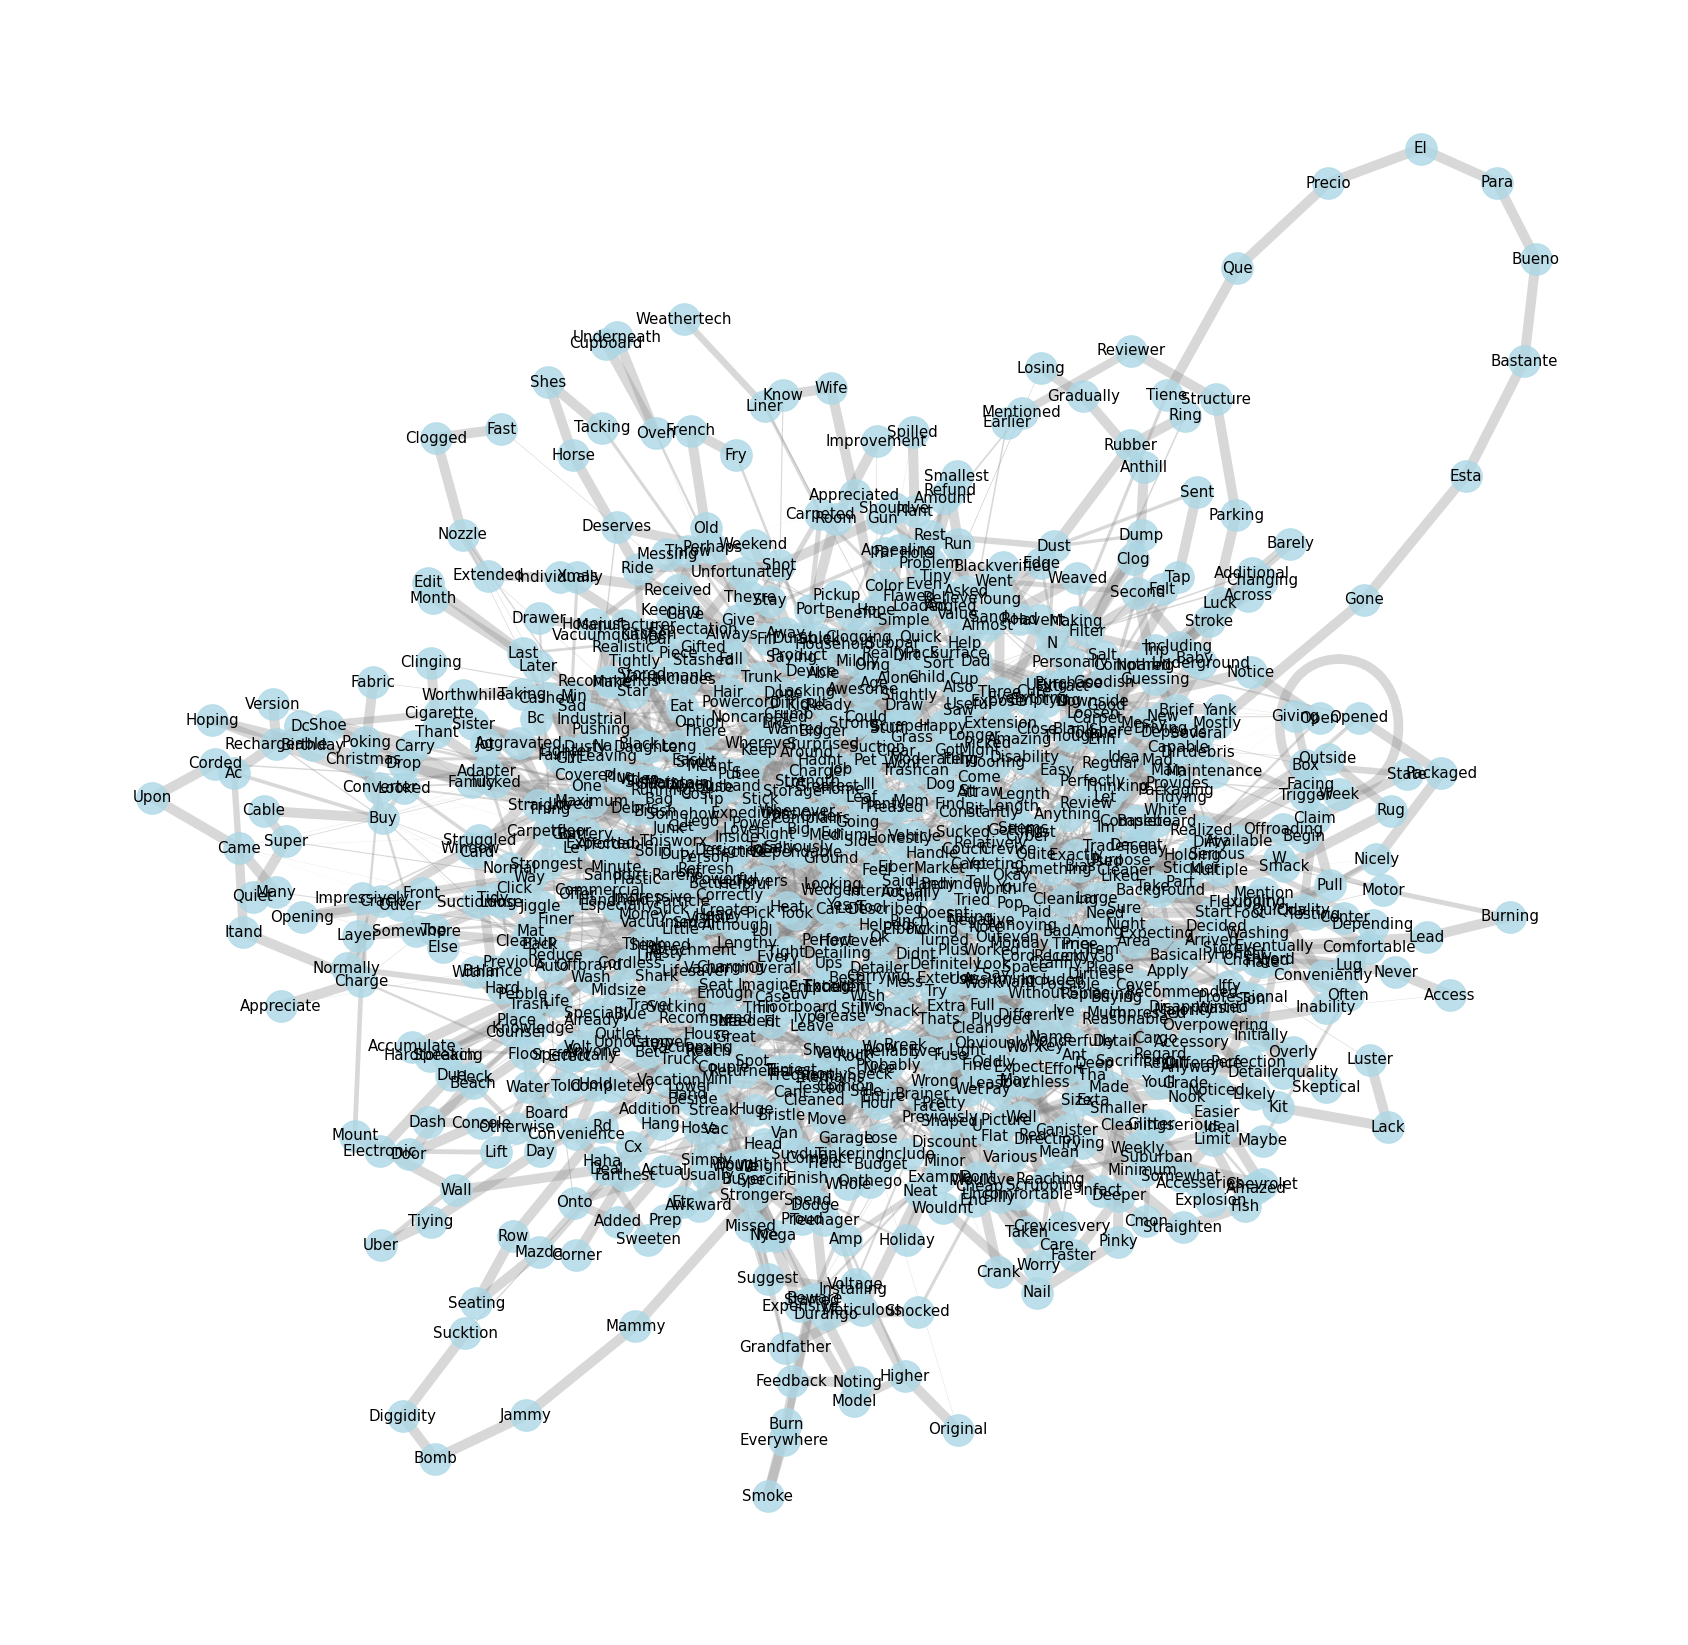

In [ ]:
# calculate edge weights based on the PMI values
edge_weights = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
max_weight = max(edge_weights.values())
edge_weights = {k: (v / max_weight) * 10 for k, v in edge_weights.items()}

# plot the network graph with scaled edge widths
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3, width=list(edge_weights.values()))
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')
plt.axis('off')
plt.show()